##### FEATURE SELECTION

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')

In [19]:
### Reading the dataset

df = pd.read_csv('dataset/agff_cleaned.csv')

In [20]:
df.drop(columns=['day', 'month', 'year'], inplace=True) ### We'll drop day month and year for now

In [21]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 1, 0)

In [22]:
df.Classes.value_counts()

Classes
0    137
1    106
Name: count, dtype: int64

In [23]:
### independent and dependent features

X = df.drop('FWI', axis=1) ### FWI -> Fire weather index -> will be our output / dependent feature
y = df['FWI']

In [24]:
### train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##### Testing for multicollinearity

<Axes: >

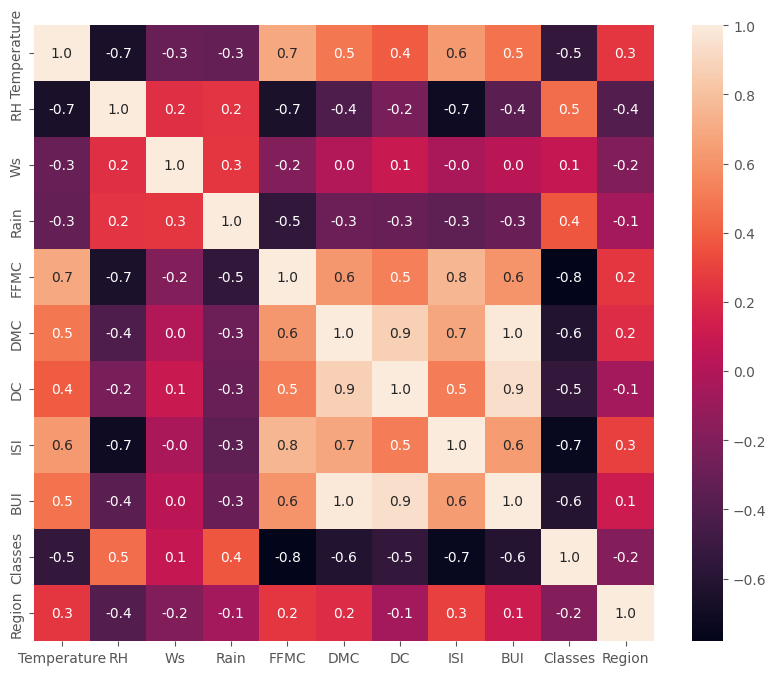

In [25]:
### Feature selection based on correlation
### highly positively correlated can be removed. We can use a threshold of 85%

plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), fmt='1.1f', annot=True)

In [26]:
def correlation(dataset, threshold):
    correlation_cols = set()
    corr = dataset.corr()
    for i in range(len(corr)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                colname = corr.columns[i]
                correlation_cols.add(colname)
    return correlation_cols

In [27]:
corr_features = correlation(X_train, 0.85)

In [28]:
### drop features when corr > 0.85

X_train.drop(columns=corr_features, axis=1, inplace=True)
X_test.drop(columns=corr_features, axis=1, inplace=True)

##### Feature Scaling / Standardization

In [29]:
### Feature scaling / standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

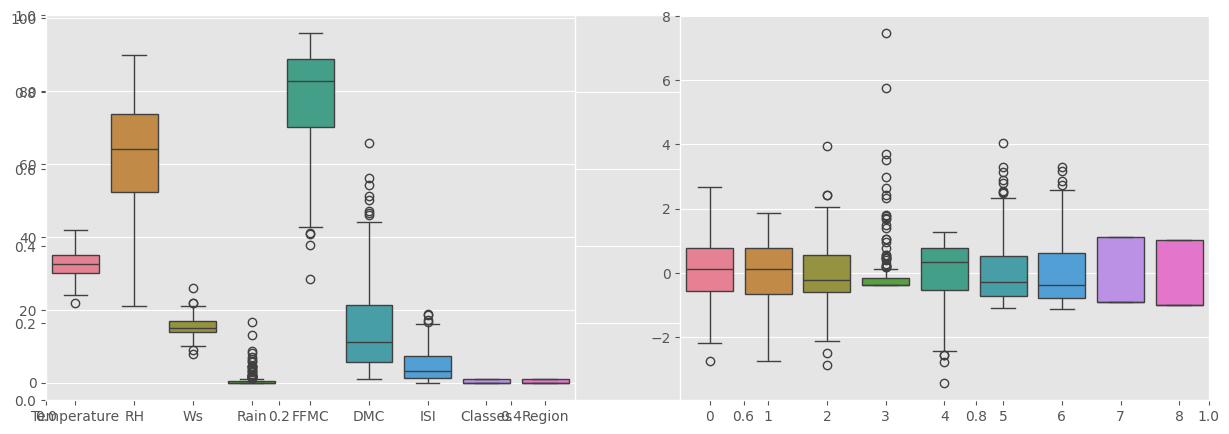

In [30]:
### Boxplots to see the effect of the standard scaler
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(X_train)
plt.subplot(1, 2, 2)
sns.boxplot(X_train_scaled)
plt.show()

### Linear Model

In [31]:
### train a model on this data

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

0.5468236465249993 0.9847657384266951


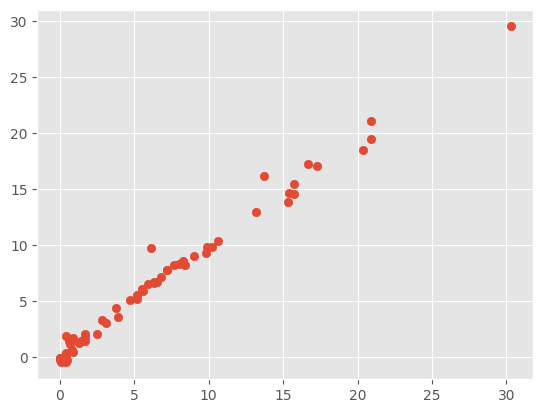

In [54]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(mae, score)
plt.scatter(y_test, y_pred)
plt.show() ### Seems to be linear, so this is very good

1.133175994914409 0.9492020263112388


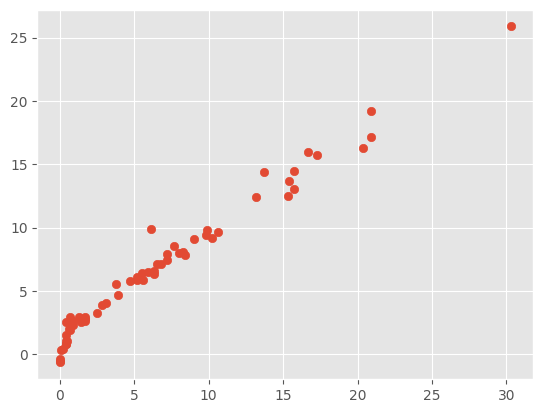

In [53]:
### There are chances of overfitting. Therefore we use Lasso regression

from sklearn.linear_model import Lasso

linreg = Lasso()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(mae, score)
plt.scatter(y_test, y_pred)
plt.show()

0.564230534010569 0.9842993364555513


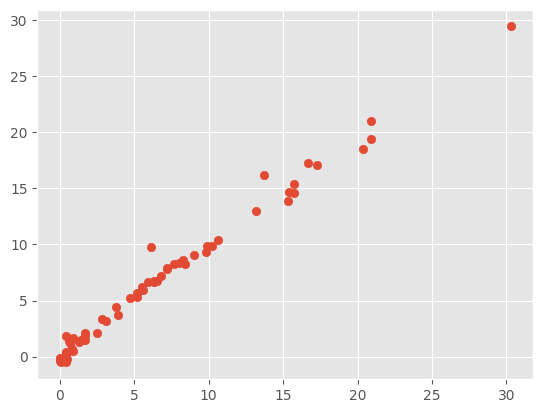

In [52]:
from sklearn.linear_model import Ridge

linreg = Ridge()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(mae, score)
plt.scatter(y_test, y_pred)
plt.show()

1.8822353634896 0.8753460589519703


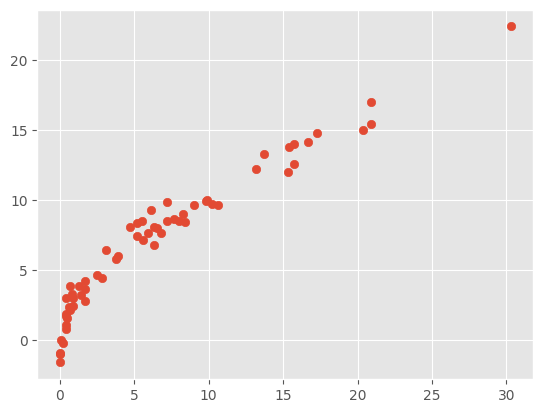

In [51]:
from sklearn.linear_model import ElasticNet
### ElasticNet has a lot of parameters

linreg = ElasticNet()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(mae, score)
plt.scatter(y_test, y_pred)
plt.show()

##### Models along with Cross Validation

In [39]:
### Cross validation Lasso

from sklearn.linear_model import LassoCV
lassocv = LassoCV()

cv = 5
lassocv.fit(X_train_scaled, y_train)

LassoCV()

In [42]:
lassocv.mse_path_, ### the mse for each path
lassocv.alphas_, ### the values that got checked
lassocv.alpha_ ### the value that got selected

np.float64(0.05725391318234408)

0.6199701158263431 0.9820946715928275


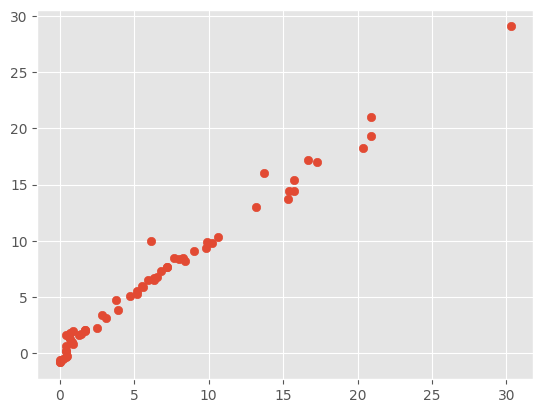

In [49]:
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(mae, score)
plt.scatter(y_test, y_pred)
plt.show()

0.564230534010569 0.9842993364555513


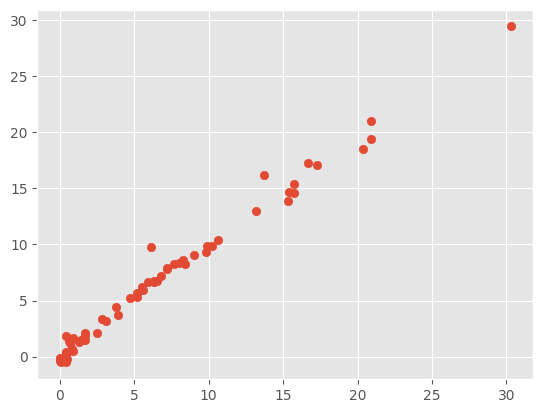

In [50]:
### Cross validation using RIDGECV

from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)

cv = 5
ridgecv.fit(X_train_scaled, y_train)

y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(mae, score)
plt.scatter(y_test, y_pred)
plt.show()

In [45]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

0.65759467314309 0.9814217587854941


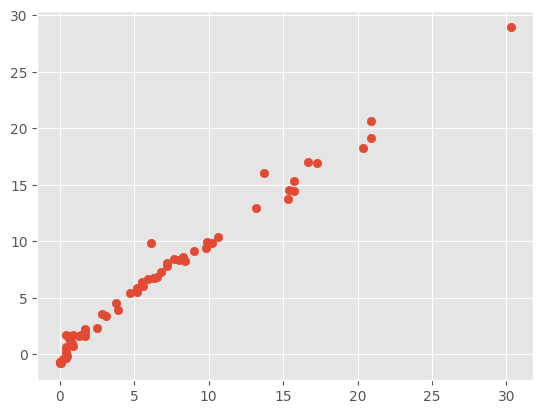

In [48]:
### Cross validation elasticnet cv

from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=5)

cv = 5
elasticnetcv.fit(X_train_scaled, y_train)

y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(mae, score)
plt.scatter(y_test, y_pred)
plt.show()

In [47]:
elasticnetcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

##### SAVING THE MODEL

In [55]:
import pickle

pickle.dump(scaler, open('model/scaler.pkl', 'wb'))
pickle.dump(ridgecv, open('model/ridge.pkl', 'wb'))
pickle.dump(elasticnetcv, open('model/elasticnet.pkl', 'wb'))